# ch04.01. 회귀문제 EDA - mpg
---
* 날짜:2022-05-10
* 이름:안창덕

## 학습내용
    - mpg 데이터 EDA
    - 회귀문제 에서의 탐색적 데이터 분석 진행

## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [1]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* seaborn에서 제공하는 `mpg` 데이터셋을 불러오기

In [5]:
df = sns.load_dataset('mpg')
df.shape
# 전체 데이터 개수 : 398개
# 칼럼수(변수의 개수) : 9개
# 9개의 특성과 상관관계를 파악하는 것이 EDA

(398, 9)

* 데이터셋 일부 확인

In [7]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

* 결측지 비율 확인

In [ ]:
# 데이터 전처리시 horspower에 대한 결측치 처리가 필요하다. <-- 이런게 인사이트

In [13]:
# 결측치 개수 / 전체 개수 * 100
df.isnull().mean() * 100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

### **| 기술통계**

* `info` 이용해 데이터 확인

In [14]:
df.info()
#정수값(이산형) 몇개  , 연속값 몇개, 범주형 몇개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


* 숫자 자료형의 기술 통계

In [15]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


* 숫자 자료형 외의 기술 통계

In [16]:
df.describe(include=object)
#unique 몇개의 범주가 있는지 top은 무엇이다.
# freq는 top의 갯수

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


* 숫자 자료형 외 값 및 개수 확인

In [18]:
for col in ['origin','name']:
  print(col)
  print(df[col].value_counts())

origin
usa       249
japan      79
europe     70
Name: origin, dtype: int64
name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: name, Length: 305, dtype: int64


### **| 변수 요약**

* 모든 속성의 분포 간단히 그리기

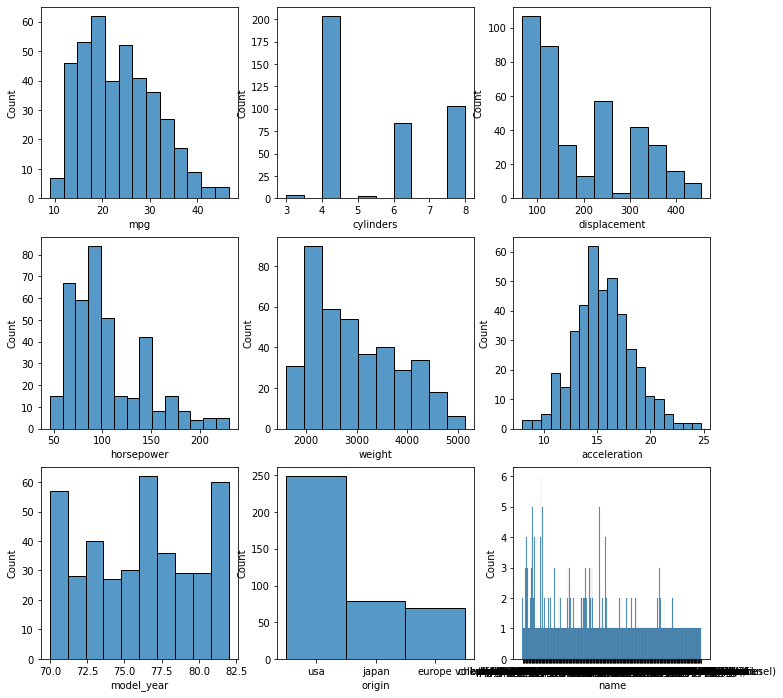

In [22]:
fig, axes = plt.subplots(3,3, figsize=(12,12))
axes = axes.flatten() # 3by3 shape을 9로 만들어준다. 1차원으로 바꿔준다.
for col,ax in zip(df.columns, axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 자료형 정리하기

In [23]:
nums = ['displacement','horsepower','weight','acceleration']#연속형
noms = ['cylinders','model_year','origin']#이산/범주형
y = 'mpg' #예측값
print('연속형 자료',nums)
print('범주 / 이산형 자료',noms)
print('예측할 변수', y)
print('추가 전처리가 필요한 속성: name')

연속형 자료 ['displacement', 'horsepower', 'weight', 'acceleration']
범주 / 이산형 자료 ['cylinders', 'model_year', 'origin']
예측할 변수 mpg
추가 전처리가 필요한 속성: name


* 데이터 정리하기
  * 데이터 소개 : 1970년대 후반 ~ 1980년 초반의 mpg(자동차 연비)를 예측한다. 연비가 높을 수록 작은 연료로 많은 거리를 간다.
  * 자료형 소개
    * 연속 자료형
      * mpg : 자동차 연비 (예측값)
      * displacement: 배기량
      * horspower: 마력
      * acceleration : 가속도
    * 이산 자료형
      * cylinders: 실린더 개수
      * weight: 자동차 무게
      * model_year: 연식
    * 범주 자료형
      * origin: 제조국가
      * name: 차명
  * 모델링을 위한 자료형 구분

연속은 스케일링만 하면 된다.

이산



## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

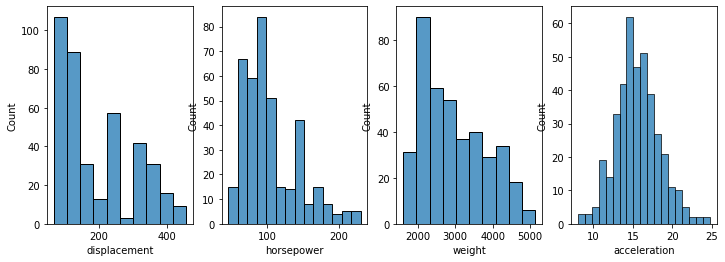

In [25]:
# nums 리스트의 자료형을 그린다.
fig, axes = plt.subplots(1,len(nums), figsize=(12,4))
axes = axes.flatten() # 3by3 shape을 9로 만들어준다. 1차원으로 바꿔준다.
for col,ax in zip(nums, axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 이산 자료형 분포 그리기

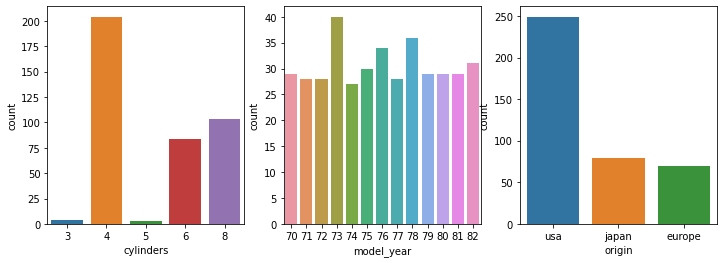

In [27]:
# noms 리스트의 자료형을 그린다.
fig, axes = plt.subplots(1,len(noms), figsize=(12,4))
axes = axes.flatten() # 3by3 shape을 9로 만들어준다. 1차원으로 바꿔준다.
for col,ax in zip(noms, axes):
  sns.countplot(data=df, x=col, ax=ax)
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [28]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


* `boxplot` 으로 연속 자료형 기술 통계 시각화하기

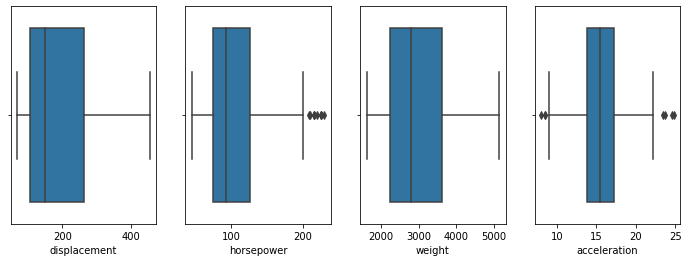

In [29]:
# nums 리스트의 자료형을 그린다.
fig, axes = plt.subplots(1,len(nums), figsize=(12,4))
axes = axes.flatten() # 3by3 shape을 9로 만들어준다. 1차원으로 바꿔준다.
for col,ax in zip(nums, axes):
  sns.boxplot(data=df, x=col, ax=ax)
plt.show()

In [ ]:
# 박스가 50%가 위치한 거 표시 울타리가 4분위수 범위의 1.5배, 점은 이상치

* `viloinplot` 으로 연속 자료형 기술 통계 시각화하기

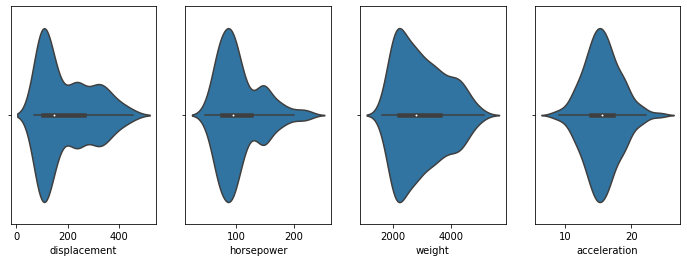

In [31]:
# nums 리스트의 자료형을 그린다.
fig, axes = plt.subplots(1,len(nums), figsize=(12,4))
axes = axes.flatten() # 3by3 shape을 9로 만들어준다. 1차원으로 바꿔준다.
for col,ax in zip(nums, axes):
  sns.violinplot(data=df, x=col, ax=ax)
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [32]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model_year      0.011535
dtype: float64

* `kurt` 이용해 첨도 구하기

In [34]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.696947
weight         -0.785529
acceleration    0.419497
model_year     -1.181232
dtype: float64

### **| 예측값에 대한 추가 시각화**

* displot으로 그리기


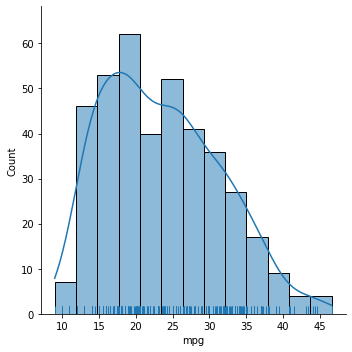

In [37]:
sns.displot(data=df, x=y, kde=True, rug=True)
plt.show()

* `boxplot`으로 기술통계 시각화 하기

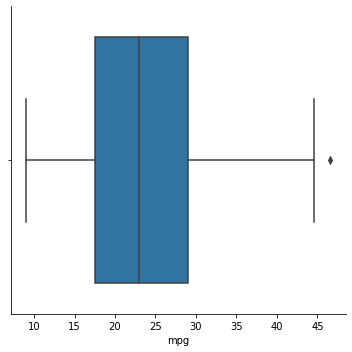

In [41]:
sns.catplot(data=df, x=y, kind='box')
plt.show()

* `violinplot`으로 기술통계 시각화 하기

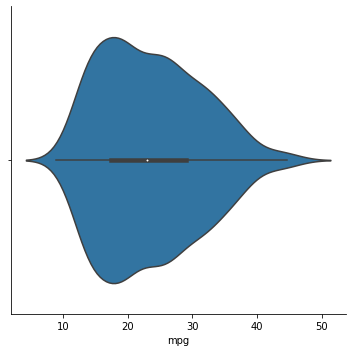

In [39]:
sns.catplot(data=df, x=y, kind='violin')
plt.show()

* `describe` 로 `mpg`의 기술통계 값 구하기

In [42]:
df['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

* `mpg` 를 `agg` 를 이용해 여러가지 통계량 구하기

In [73]:
#agg는 여러개의 통계량을 알 수 있다.
df.mpg.agg(['std','mean','min','max','skew','kurt'])

std      7.815984
mean    23.514573
min      9.000000
max     46.600000
skew     0.457066
kurt    -0.510781
Name: mpg, dtype: float64

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [56]:
a = df.corr()

* `style.background_gradient` 이용해 상관계수 시각화 하기

In [79]:
df.corr().style.background_gradient(cmap='coolwarm')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


* `heatmap` 이용해 상관계수 시각화 하기

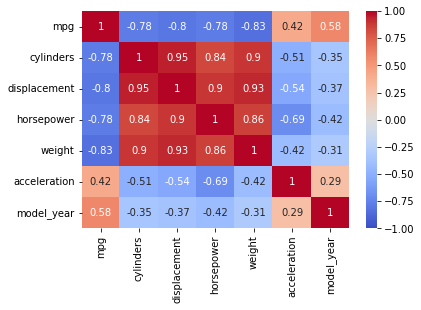

In [78]:
sns.heatmap(data=a, cmap='coolwarm', annot=True, vmax=1, vmin=-1)
plt.show()

* 예측값과 관련있는 속성 순서대로 정리하기

In [77]:
# 실린더 개수가 많을수록 무게 증가, 마력증가, 배기량 증가
# 실린더 개수가 많을 수록 연비가 낮다.
a.iloc[:,0]

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.778427
weight         -0.831741
acceleration    0.420289
model_year      0.579267
Name: mpg, dtype: float64

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

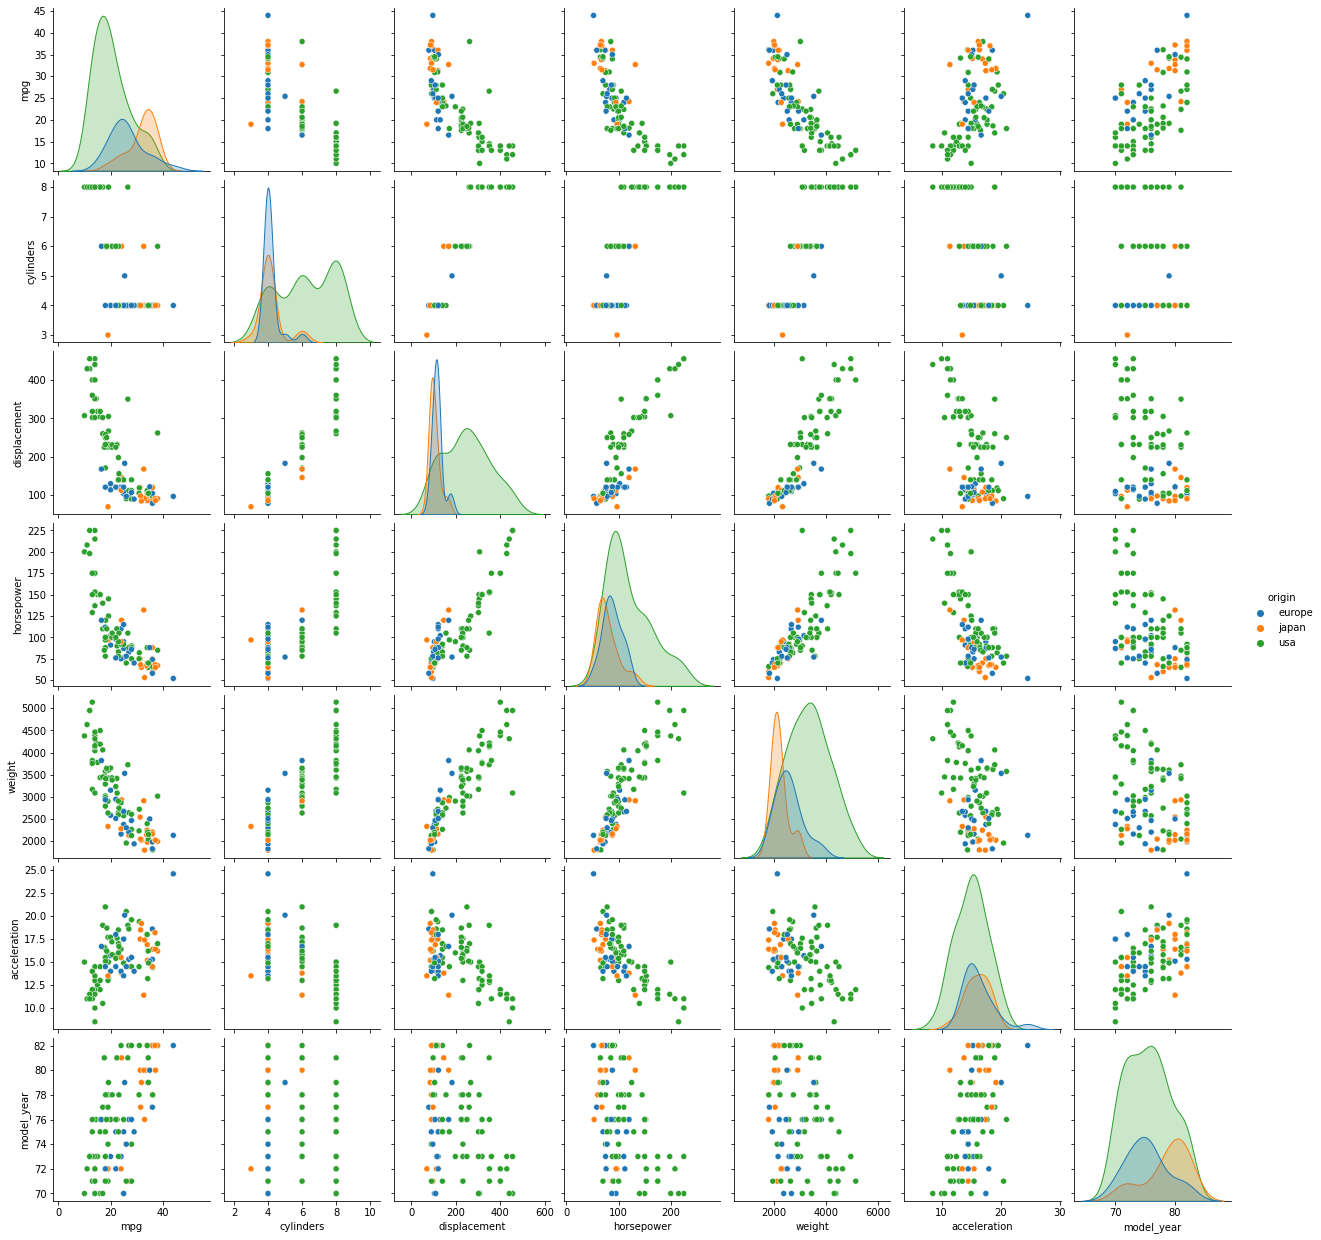

In [81]:
# pairplot은 오래 걸린다. 따라서 소량의 샘플을 그리는게 좋다.
#df.sample(100) #샘플 100개
sns.pairplot(df.sample(100), hue='origin')   #hue는 범주형으로
plt.show()

* `boxplot`으로 범주 속성별 예측값 관계 시각화하기

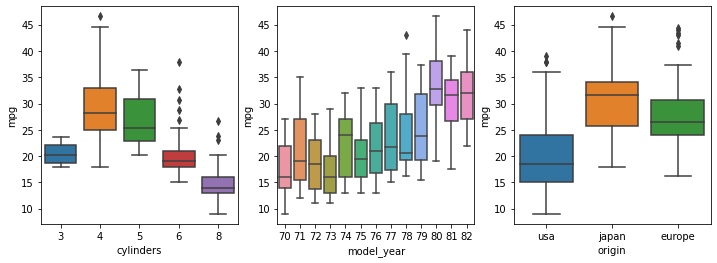

In [82]:
# x=범주잘형, y=연비

# noms 리스트의 자료형을 그린다.
fig, axes = plt.subplots(1,len(noms), figsize=(12,4))
axes = axes.flatten() # 3by3 shape을 9로 만들어준다. 1차원으로 바꿔준다.
for col,ax in zip(noms, axes):
  sns.boxplot(data=df, x=col, y='mpg', ax=ax)
plt.show()

* `scatterplot` 이용해 연속 자료형 별 예측값의 관계 시각화하기

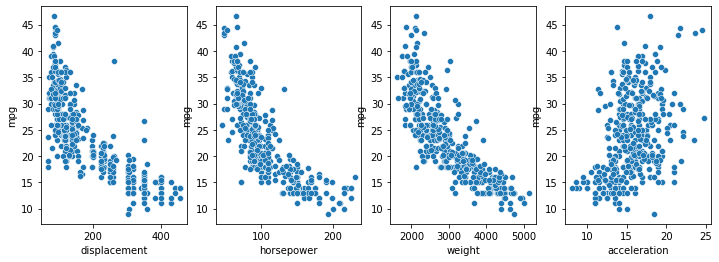

In [86]:
# 연속형과 연속형을 비교
# x는 연속자료형 y = mpg

fig, axes = plt.subplots(1,len(nums), figsize=(12,4))
axes = axes.flatten() # 3by3 shape을 9로 만들어준다. 1차원으로 바꿔준다.
for col,ax in zip(nums, axes):
  sns.scatterplot(data=df, x=col, y='mpg', ax=ax)
plt.show()

* `hue` 옵션에 `origin` 추가해서 그리기 

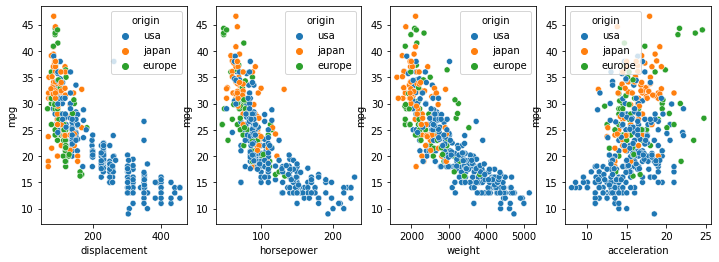

In [87]:
fig, axes = plt.subplots(1,len(nums), figsize=(12,4))
axes = axes.flatten() # 3by3 shape을 9로 만들어준다. 1차원으로 바꿔준다.
for col,ax in zip(nums, axes):
  sns.scatterplot(data=df, x=col, y='mpg', ax=ax, hue='origin')
plt.show()

* `regplot`으로 회귀 시각화

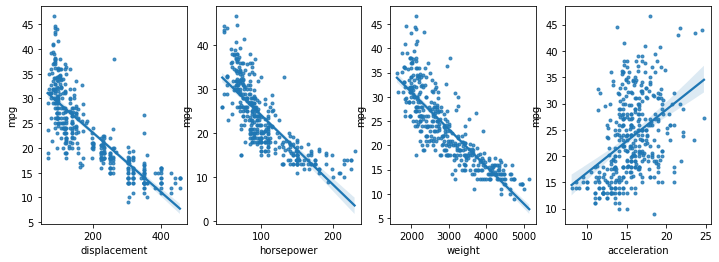

In [90]:
#
fig, axes = plt.subplots(1,len(nums), figsize=(12,4))
axes = axes.flatten() # 3by3 shape을 9로 만들어준다. 1차원으로 바꿔준다.
for col,ax in zip(nums, axes):
  sns.regplot(data=df, x=col, y='mpg', ax=ax, marker='.')
plt.show()

* `residplot`으로 잔차 시각화

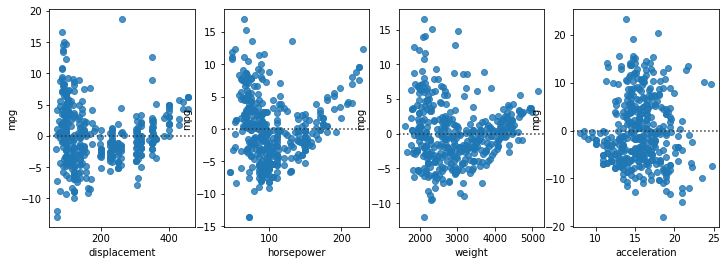

In [92]:
# 편차   0이 기대값
fig, axes = plt.subplots(1,len(nums), figsize=(12,4))
axes = axes.flatten() # 3by3 shape을 9로 만들어준다. 1차원으로 바꿔준다.
for col,ax in zip(nums, axes):
  sns.residplot(data=df, x=col, y='mpg', ax=ax)
plt.show()

* `lmplot`으로 `origin`별 회귀 시각화

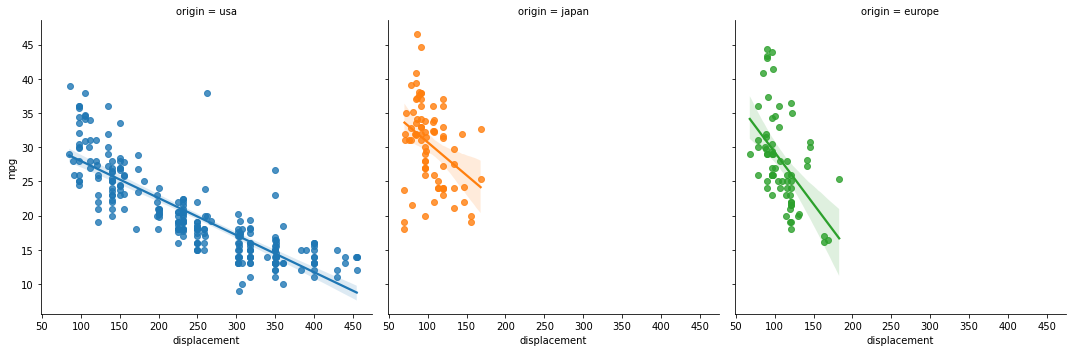

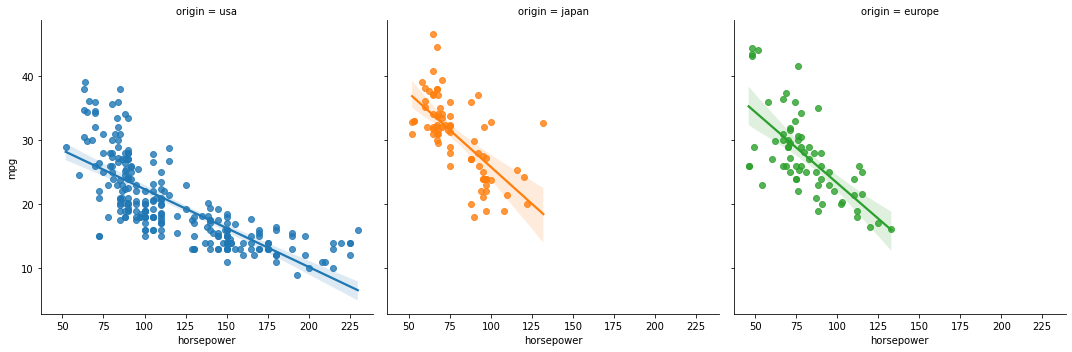

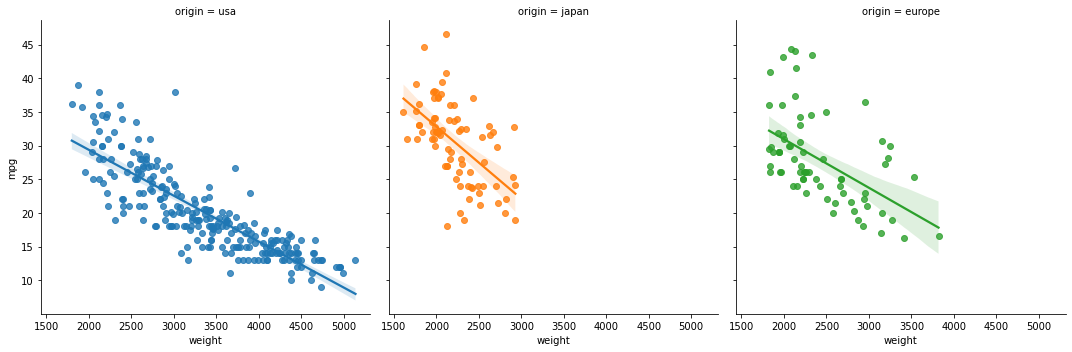

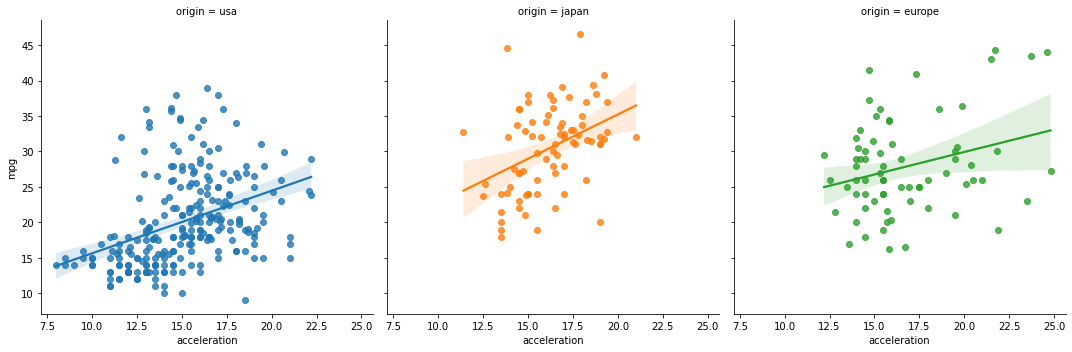

In [98]:
for col in nums:
  sns.lmplot(data=df, x=col, y=y, hue='origin', col='origin')
  plt.show()

In [99]:
# 데이터 전처리

nums, noms

(['displacement', 'horsepower', 'weight', 'acceleration'],
 ['cylinders', 'model_year', 'origin'])

In [ ]:
# nums -> min/max, z-csore 스케일링
# cylinders, model_year, 이산형, 순서가 존재, 0,1,2
# cylinders = 1,2,3,4, ...7 -> 0,1,2,3....6
# model_year = 198..., ... -> 0,1,2,3....6
# origin = 미국, 일본, 유럽 -> [1,0,0],[0,1,0]....

# 결측값 처리
# name 속성 추가 전처리